In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
train_df=pd.read_csv('/content/drive/MyDrive/Final_year_project_code/train_data.csv')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_id               20000 non-null  object 
 1   memory_GB            20000 non-null  float64
 2   network_log10_MBps   20000 non-null  float64
 3   local_IO_log10_MBps  20000 non-null  float64
 4   NFS_IO_log10_MBps    20000 non-null  float64
 5   failed               20000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 937.6+ KB


In [7]:
print(train_df.shape)

(20000, 6)


In [8]:
print(train_df)

             job_id  memory_GB  network_log10_MBps  local_IO_log10_MBps  \
0      jobID1634295    44.3904             -1.0262               0.8033   
1      jobID2033452    31.5839             -1.4608              -0.6080   
2      jobID2068800   154.4610             -0.5508              -0.3637   
3        jobID78826    71.8570              3.5701              -0.1281   
4      jobID2935014    30.0370              3.3094              -0.9463   
...             ...        ...                 ...                  ...   
19995  jobID3638409    62.2909             -1.3317               0.8725   
19996  jobID1716406    19.8377              3.1328              -0.2947   
19997   jobID360445    22.1773              3.5185              -0.4147   
19998   jobID335571    14.8184              2.7831              -1.0320   
19999  jobID1165709     7.9835              0.7225              -1.1583   

       NFS_IO_log10_MBps  failed  
0                -3.0000       0  
1                -2.9967     

In [11]:
X = train_df.iloc[:, 1:5]
y = train_df.iloc[:,5]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE()

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X,y)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
print(oversampled)
print(oversampled.shape)

       failed   memory_GB  network_log10_MBps  local_IO_log10_MBps  \
0           0   44.390400           -1.026200             0.803300   
1           0   31.583900           -1.460800            -0.608000   
2           0  154.461000           -0.550800            -0.363700   
3           0   71.857000            3.570100            -0.128100   
4           0   30.037000            3.309400            -0.946300   
...       ...         ...                 ...                  ...   
36743       1    9.839100            0.200697            -0.133824   
36744       1    7.663320           -0.556876            -0.635834   
36745       1   27.610788            3.192247            -0.681611   
36746       1    5.011891            0.106153             0.192924   
36747       1   15.867645            2.996665            -0.507497   

       NFS_IO_log10_MBps  
0              -3.000000  
1              -2.996700  
2              -3.000000  
3               2.304000  
4              -3.000000

<Axes: xlabel='failed', ylabel='count'>

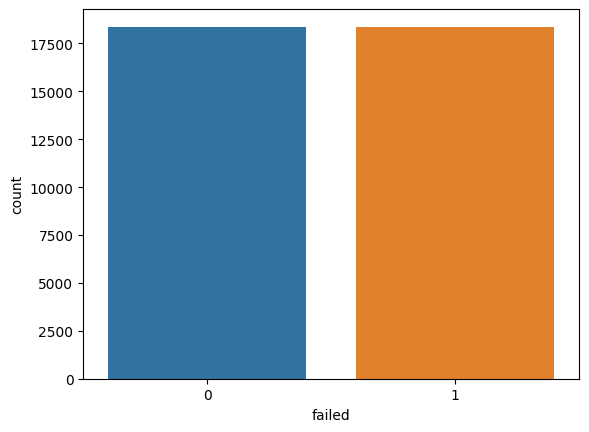

In [13]:
import seaborn as sns
sns.countplot(x='failed',data=oversampled)

                     memory_GB  network_log10_MBps  local_IO_log10_MBps  \
memory_GB             1.000000            0.133991             0.087605   
network_log10_MBps    0.133991            1.000000            -0.380727   
local_IO_log10_MBps   0.087605           -0.380727             1.000000   
NFS_IO_log10_MBps     0.085517            0.214385            -0.077350   

                     NFS_IO_log10_MBps  
memory_GB                     0.085517  
network_log10_MBps            0.214385  
local_IO_log10_MBps          -0.077350  
NFS_IO_log10_MBps             1.000000  


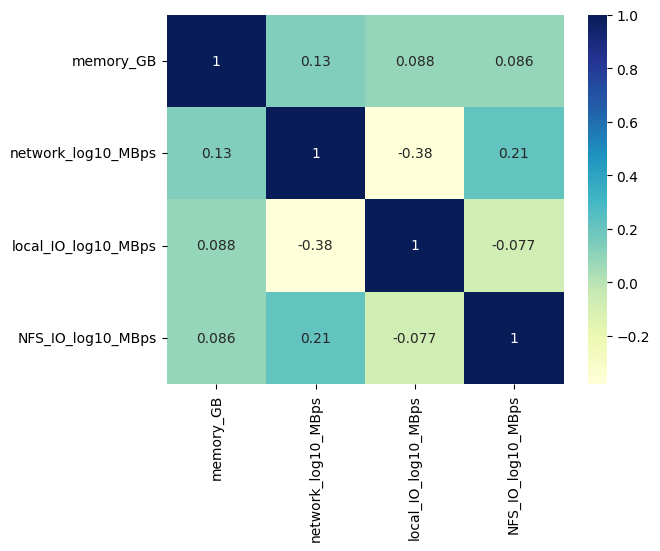

In [14]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  

  
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(oversampled_X.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(oversampled_X.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

<ipython-input-16-1282a4e8f052>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(oversampled_X['memory_GB'], ax = ax[0,1])
<ipython-input-16-1282a4e8f052>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(oversampled_X['network_log10_MBps'], ax = ax[1,1])
<ipython-input-16-1282a4e8f052>:7: UserWa

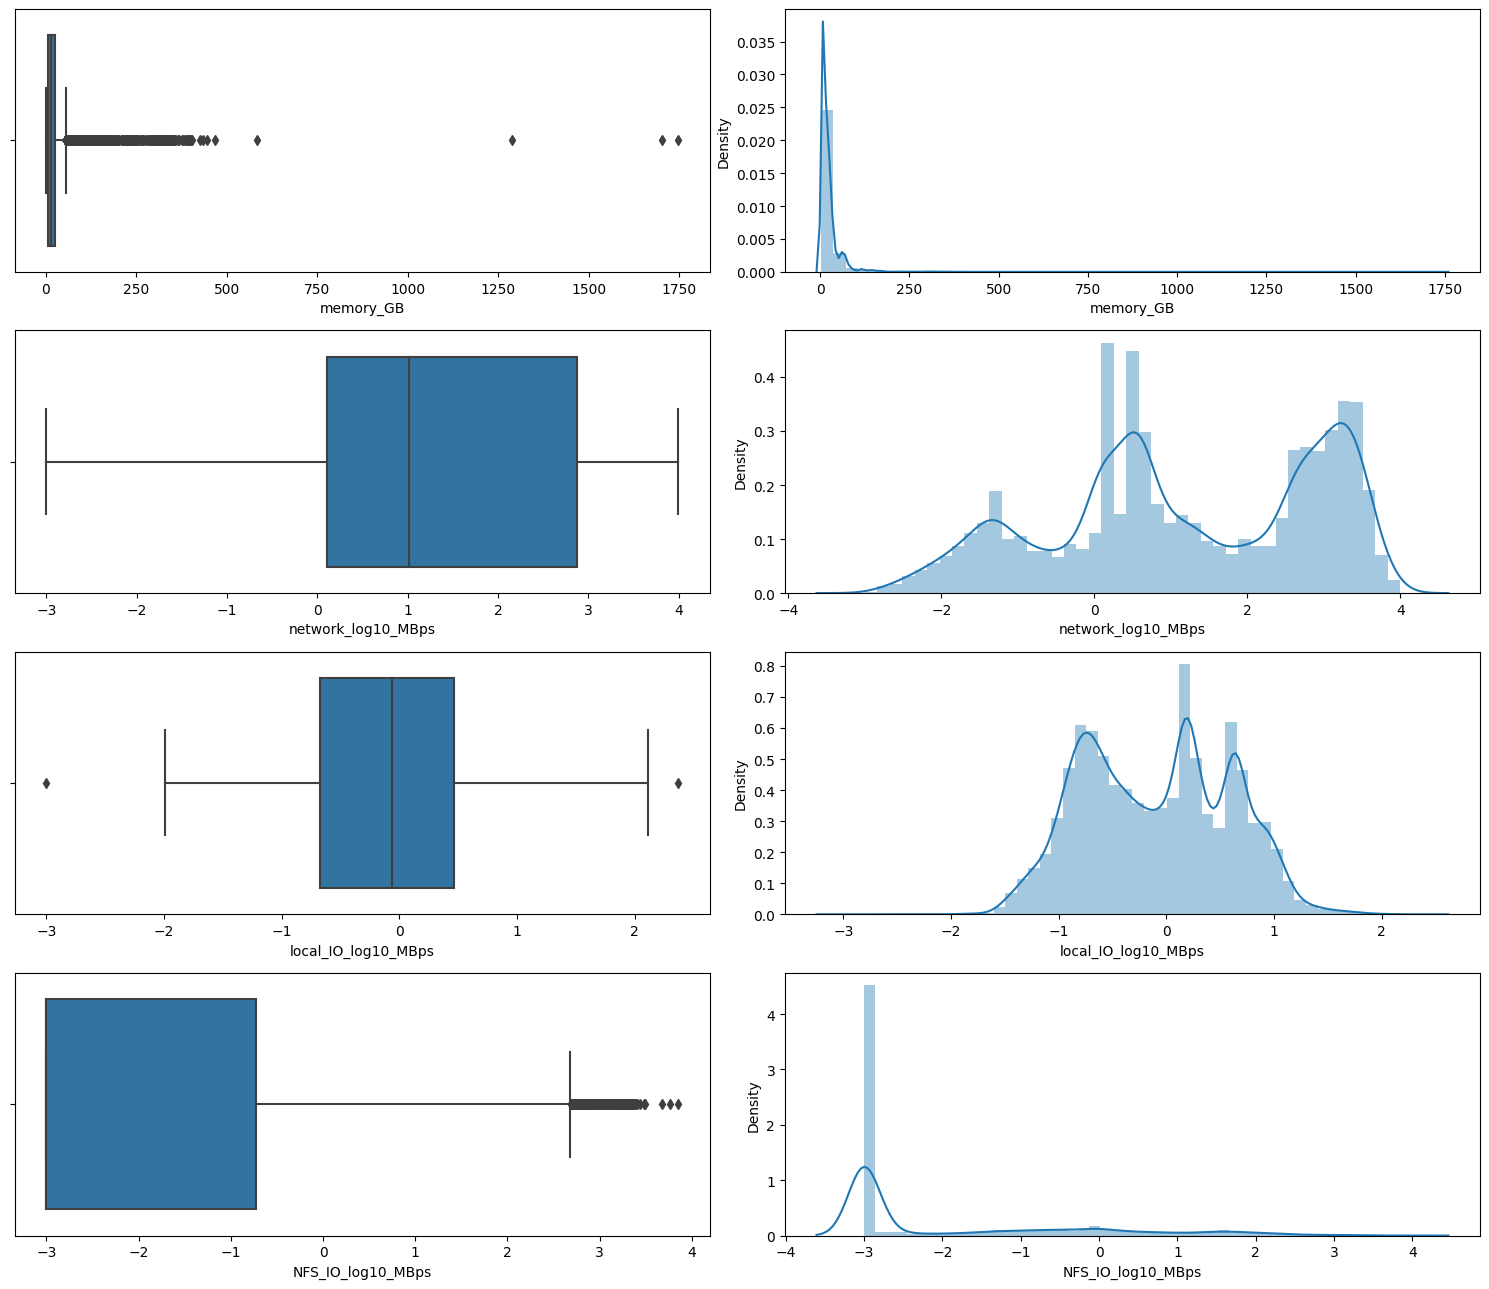

In [16]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= oversampled_X["memory_GB"], ax = ax[0,0])
sns.distplot(oversampled_X['memory_GB'], ax = ax[0,1])
sns.boxplot(x= oversampled_X["network_log10_MBps"], ax = ax[1,0])
sns.distplot(oversampled_X['network_log10_MBps'], ax = ax[1,1])
sns.boxplot(x= oversampled_X["local_IO_log10_MBps"], ax = ax[2,0])
sns.distplot(oversampled_X['local_IO_log10_MBps'], ax = ax[2,1])
sns.boxplot(x= oversampled_X["NFS_IO_log10_MBps"], ax = ax[3,0])
sns.distplot(oversampled_X['NFS_IO_log10_MBps'], ax = ax[3,1])

plt.tight_layout()

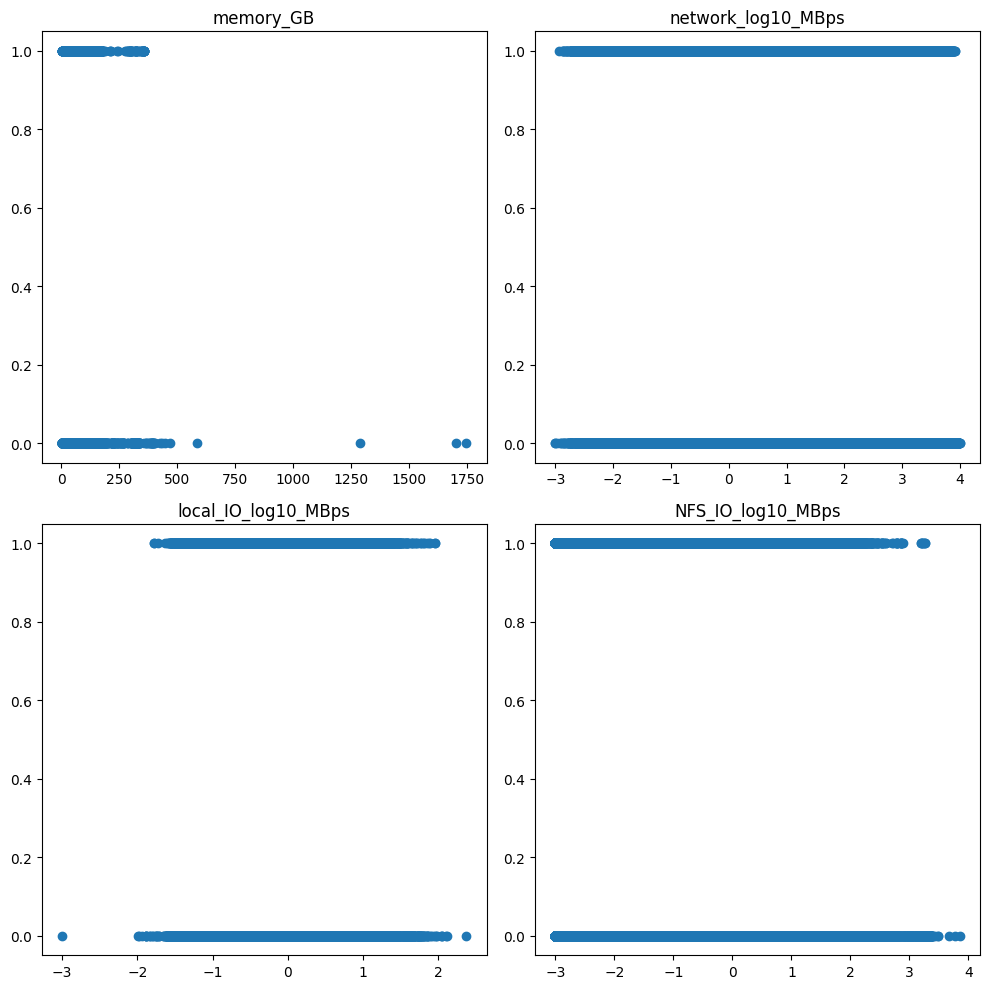

In [22]:
f,axarr = plt.subplots(2,2, figsize=(10,10))
failed_val = oversampled.failed.values
axarr[0,0].scatter(oversampled_X.memory_GB.values, failed_val)
axarr[0,0].set_title('memory_GB')
axarr[0,1].scatter(oversampled_X.network_log10_MBps.values, failed_val)
axarr[0,1].set_title('network_log10_MBps')
axarr[1,0].scatter(oversampled_X.local_IO_log10_MBps.values, failed_val)
axarr[1,0].set_title('local_IO_log10_MBps')
axarr[1,1].scatter(oversampled_X.NFS_IO_log10_MBps.values, failed_val)
axarr[1,1].set_title('NFS_IO_log10_MBps')


plt.tight_layout()
plt.show()


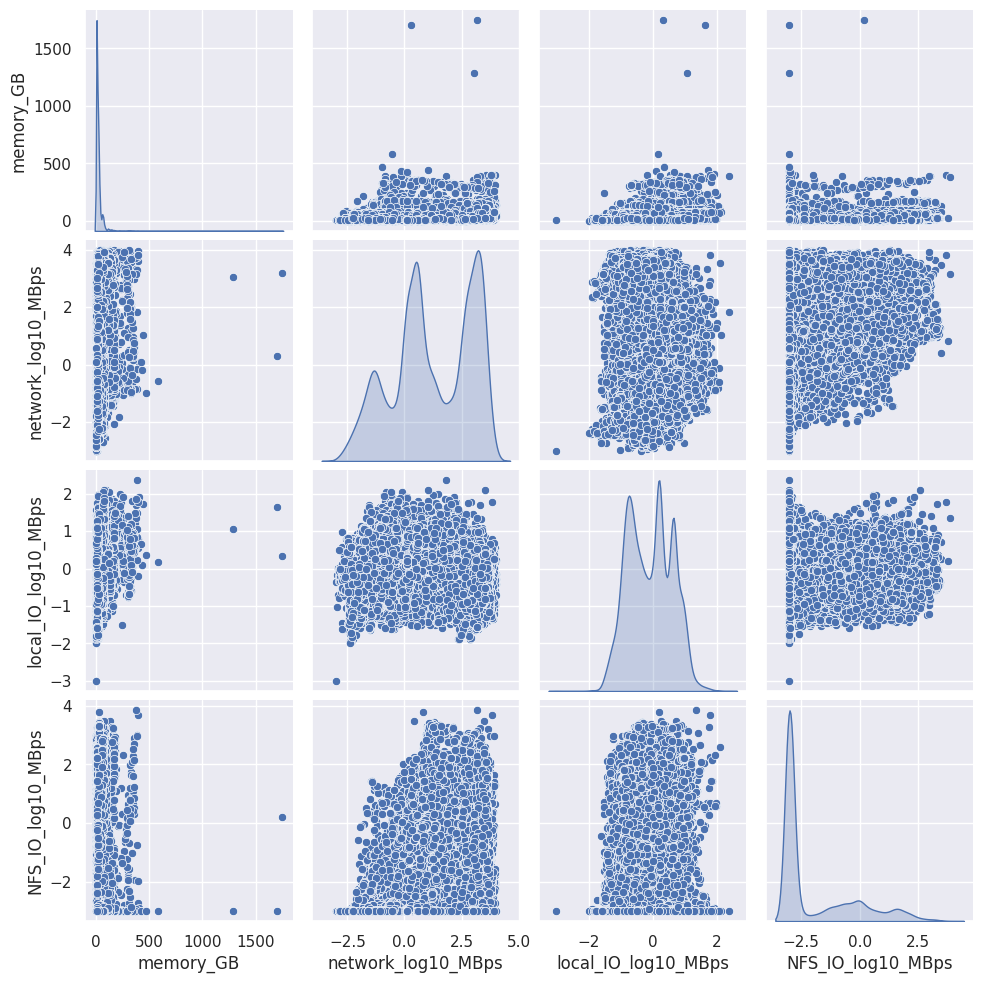

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = oversampled_X.iloc[:, :]
sns.pairplot(cData_attr, diag_kind='kde')   

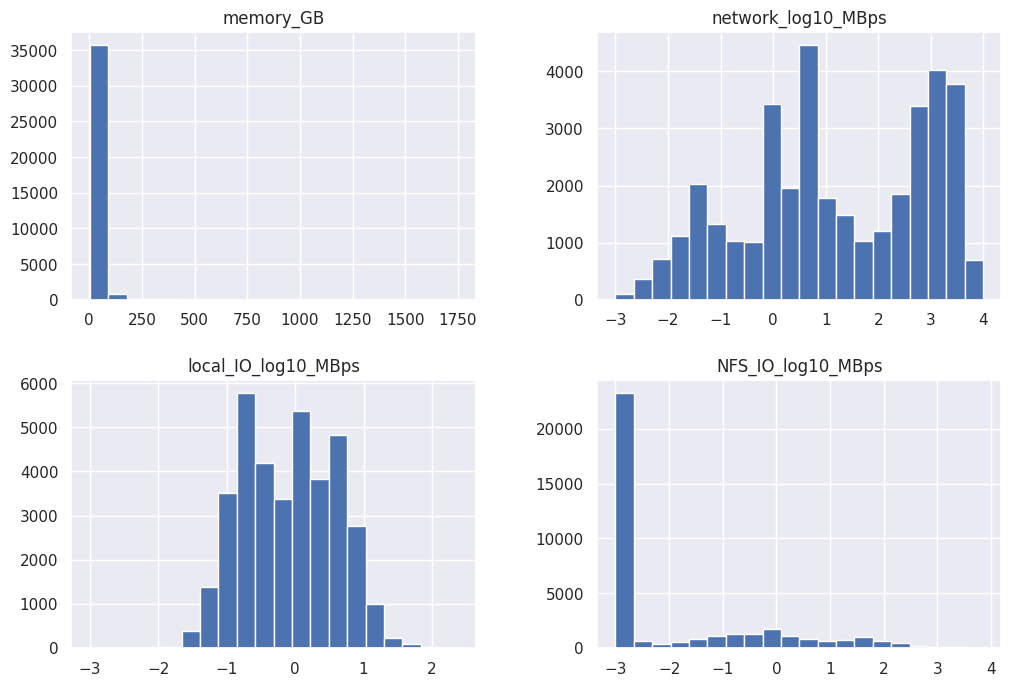

In [24]:
oversampled_X.hist(figsize=(12,8),bins=20)
plt.show()